In [316]:
#Caroline aboleil , 25/6/23

### analyzing the spotify streaming top 50 chart

Spotify is one of the leading streaming platforms and  has become a go-to destination for music lovers worldwide.
In this data analysis project, we delve into the captivating world of Spotify streaming and focus on the "Top 50" songs. The dataset we will be exploring contains valuable insights into the songs that have captured the attention and interest of listeners.
the dataset used in this project was obtained from Kaggle.com

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar
import os

In [318]:
os.chdir('C:\\Users\\windows\\Desktop\\data analyst\\spotify')

In [319]:
#loading the data:

In [320]:
df = pd.read_csv('spotify-streaming-top-50-world.csv')

In [321]:
#examinng the row data:

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             400 non-null    object
 1   position         400 non-null    int64 
 2   song             400 non-null    object
 3   artist           400 non-null    object
 4   popularity       400 non-null    int64 
 5   duration_ms      400 non-null    int64 
 6   album_type       400 non-null    object
 7   total_tracks     400 non-null    int64 
 8   release_date     400 non-null    object
 9   is_explicit      400 non-null    bool  
 10  album_cover_url  400 non-null    object
dtypes: bool(1), int64(4), object(6)
memory usage: 31.8+ KB


In [323]:
df.head(5)

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,165671,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,194563,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,234352,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,174253,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...
4,2023-05-18,5,Flowers,Miley Cyrus,91,200600,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...


In [324]:
df.tail(5)

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
395,2023-05-25,46,Unholy (feat. Kim Petras),Sam Smith,86,156943,album,13,2023-01-27,False,https://i.scdn.co/image/ab67616d0000b273fc3ff5...
396,2023-05-25,47,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira,94,214945,single,1,2023-01-11,False,https://i.scdn.co/image/ab67616d0000b2732b6d78...
397,2023-05-25,48,Frágil,Yahritza Y Su Esencia & Grupo Frontera,90,160517,single,1,2023-04-07,False,https://i.scdn.co/image/ab67616d0000b27357ed58...
398,2023-05-25,49,Yellow,Coldplay,91,266773,album,10,2000-07-10,False,https://i.scdn.co/image/ab67616d0000b2733d92b2...
399,2023-05-25,50,Por las Noches,Peso Pluma,93,239845,single,1,2021-06-11,False,https://i.scdn.co/image/ab67616d0000b273427d9a...


In [325]:
#deleting the columns that are not beneficial to our analysis:

In [326]:
df = df.drop(columns = ['total_tracks', 'is_explicit', 'album_cover_url' , 'date'] )

In [327]:
#converting the datatype of the release_date column to an appropriate date type:

In [328]:
df['release_date'] = df['release_date'].astype('datetime64[ns]')

In [329]:
#making sure the data is clean,dose not include empty rows and is ready for the next steps:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   position      400 non-null    int64         
 1   song          400 non-null    object        
 2   artist        400 non-null    object        
 3   popularity    400 non-null    int64         
 4   duration_ms   400 non-null    int64         
 5   album_type    400 non-null    object        
 6   release_date  400 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 22.0+ KB


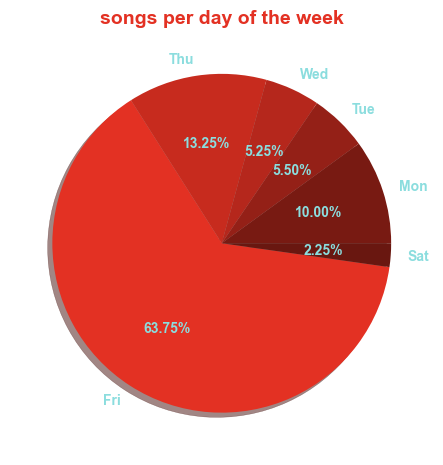

In [330]:
#the number of songs released each day of the week:
days_of_week = df.groupby(df['release_date'].dt.dayofweek).count()['song']
days_of_week.index = days_of_week.index.map(lambda x: calendar.day_abbr[x])
plt.pie(days_of_week.values, labels=days_of_week.index, autopct='%1.2f%%' , shadow=True
         ,  colors =['#781A12','#942017','#B5271C','#C72B1E','#E33123','#691710'] ,textprops={ 'color': '#8BDDDE','weight': 'bold'})
plt.title('songs per day of the week' ,
          fontsize = 14 , color = '#E33123',weight='bold' )
plt.show()
#we can clearly see that most songs were released on fridays,and none were releaed on sundays

In [331]:
#the top 10 most popular artists:

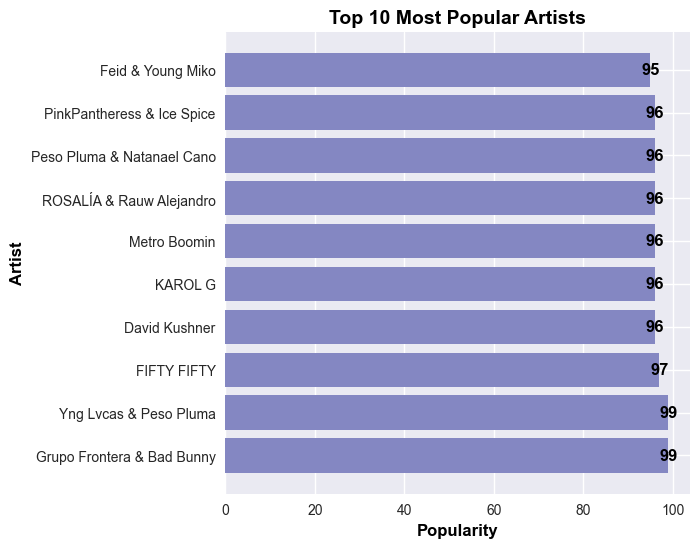

In [332]:
MostPopular = df.drop_duplicates(subset='artist').nlargest(10, 'popularity')[['artist', 'popularity']]
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,6))
plt.barh(MostPopular['artist'], MostPopular['popularity'], color='#8487C2')
plt.xlabel('Popularity', fontsize=12, color='k', weight='bold')
plt.ylabel('Artist', fontsize=12, color='k', weight='bold')
plt.title('Top 10 Most Popular Artists', fontsize=14, color='k', weight='bold')
for i, j in zip(MostPopular['popularity'], MostPopular['artist']):
    plt.text(i, j, str(i), color='k', ha="center", va="center", size=12, weight='bold')
plt.show()

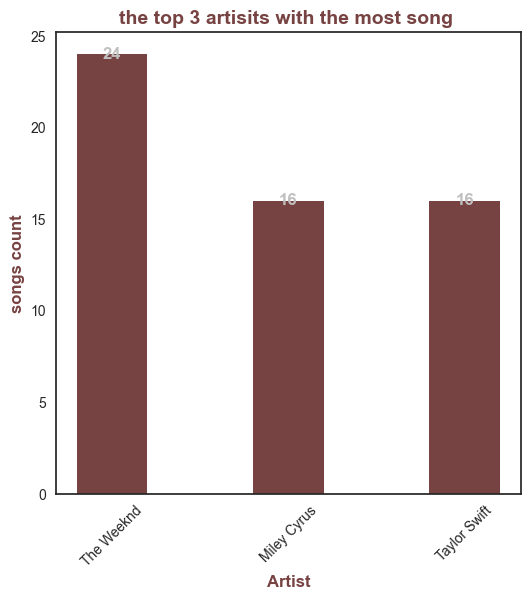

In [333]:
#the top 3 artisits with the most songs :
Top3=df.groupby('artist').count()['song'].nlargest(3)
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(6,6))
plt.bar(Top3.index, Top3.values , width = 0.4 , color = '#774342')
plt.xlabel('Artist' ,fontsize = 12 , color = '#774342' , weight='bold')
plt.ylabel('songs count' , fontsize = 12 , color = '#774342' ,weight='bold')
plt.title('the top 3 artisits with the most song ' , fontsize = 14 , color = '#774342' ,weight='bold')
for i,j in zip(Top3.index,Top3):
    plt.annotate(str(j),xy=(i,j),color='#C0C0C0',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.xticks(rotation=45)
plt.show()

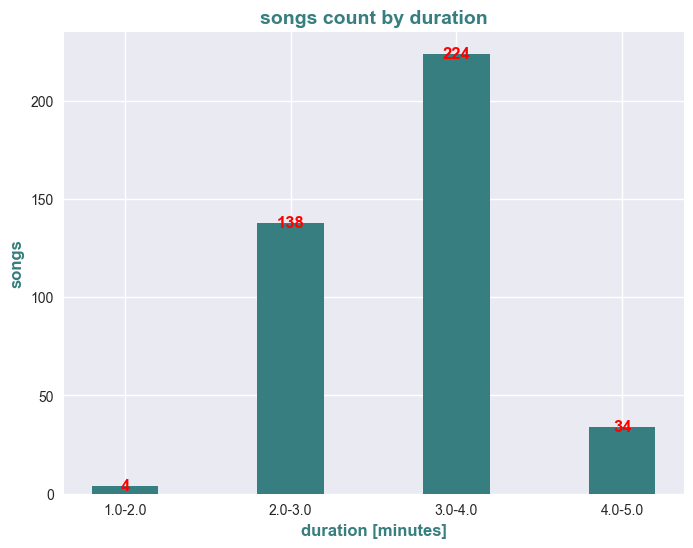

In [334]:
#Songs count by duration:
#the data is presented in milliseconds and i prefer to have it in an easier to read format, so i'm adding a few columns that would assisit in this analysis:
df['duration_sec'] = df['duration_ms'] / 1000
df['duration_min'] = df['duration_sec'] // 60
df['duration_sec'] = df['duration_sec'] % 60
df['duration_formatted'] = df.apply(lambda row: f"{int(row['duration_min']):02d}:{int(row['duration_sec']):02d}", axis=1)
duration=df.groupby('duration_min').count()['song']
x_labels = [f'{i}-{i+1}' for i in duration_counts.index]
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8,6))
plt.bar(duration.index, duration.values , width = 0.4 , color = '#367E7F')
plt.xlabel('duration [minutes]' ,fontsize = 12 , color = '#367E7F' , weight='bold')
plt.ylabel('songs' , fontsize = 12 , color = '#367E7F' ,weight='bold')
plt.title('songs count by duration' , fontsize = 14 , color = '#367E7F' ,weight='bold')
plt.xticks(duration_counts.index, x_labels)
for i,j in zip(duration.index,duration):
    plt.annotate(str(j),xy=(i,j),color='r',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()



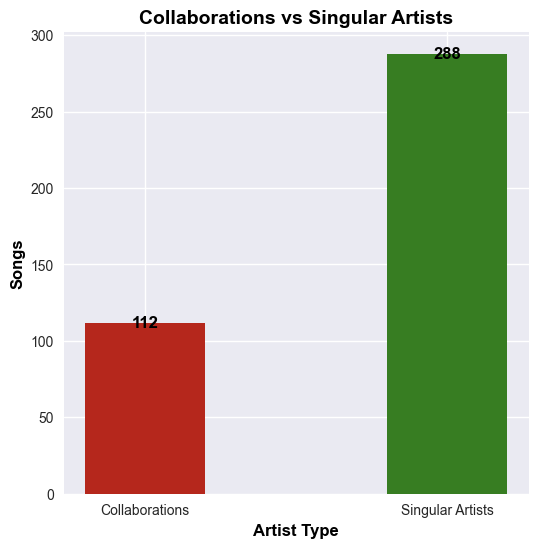

In [335]:
#songs by a single artist vs collabrations:
collab = df[df['artist'].str.contains('&')]
singular=df[~df['artist'].str.contains('&')]
collab_count = collab.count()['song']
singular_count = singular.count()['song']

categories = ['Collaborations', 'Singular Artists']
song_count = [collab_count, singular_count]

plt.figure(figsize=(6,6))
plt.bar(categories, song_count,width = 0.4 , color=['#B5271C', '#377D22'])
plt.xlabel('Artist Type', fontsize=12, color='k', weight='bold')
plt.ylabel('Songs', fontsize=12, color='k', weight='bold')
plt.title('Collaborations vs Singular Artists', fontsize=14, color='k', weight='bold')
for i,j in zip(categories,song_count):
    plt.annotate(str(j),xy=(i,j),color='k',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()
